## Importing Libraries

In [1]:
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt 
import seaborn as sns   

## Importing the CSV file

In [2]:
df=pd.read_csv(r"C:\Users\ADMIN\Downloads\PYTHON FILES\Deep_Learning\Assignments & Projects\Assignment 4\Multiple CSV\9.random.csv",header=None) 
df.head() 

,0,1,2
0,0.374,1.080,0.0
1,0.445,1.140,1.0
2,0.514,1.130,0.0
3,0.466,1.240,1.0
4,0.371,0.968,1.0


In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       400 non-null    float64
 1   1       400 non-null    float64
 2   2       400 non-null    float64
dtypes: float64(3)
memory usage: 9.5 KB


In [4]:
# Checking whether target variable is imbalanced or not
df[2].value_counts()   

1.0    202
0.0    198
Name: 2, dtype: int64

In [5]:
# Checking for outliers

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='0'>

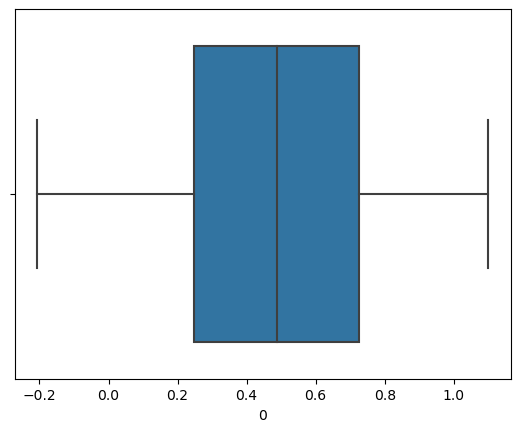

In [6]:
sns.boxplot(df[0])   

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='1'>

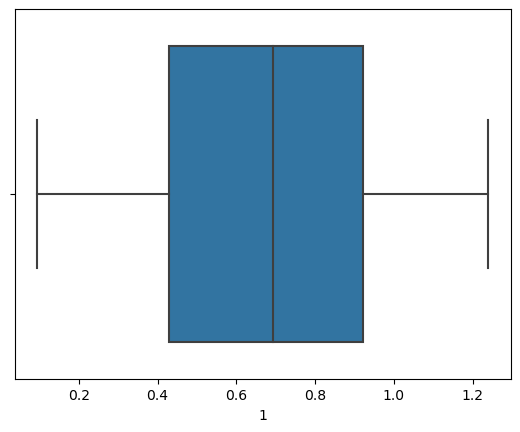

In [7]:
sns.boxplot(df[1])   

## Identifying the input and output features

In [40]:
x=df[[0,1]] 
y=df[2].astype(int)  

## Spliting the data into train and test

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.15)  

## Standardizing input features

In [42]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
x_train=std.fit_transform(x_train)
x_test=std.transform(x_test) 

## Build the Logical Structure

In [35]:
from keras import Sequential 
from keras.layers import Dense, BatchNormalization 
from keras.regularizers import L1,L2,L1L2 
from keras.optimizers import SGD 

In [36]:
model=Sequential()
model.add(Dense(20,activation="relu",kernel_regularizer=L2(0.01),bias_regularizer=L2(0.01),input_dim=2))
model.add(Dense(16,activation="relu",kernel_regularizer=L2(0.01),bias_regularizer=L2(0.01)))
model.add(BatchNormalization())
# model.add(Dense(14,activation="relu",kernel_regularizer=L2(0.01),bias_regularizer=L2(0.01)))
model.add(Dense(10,activation="relu",kernel_regularizer=L2(0.01),bias_regularizer=L2(0.01)))
model.add(Dense(1,activation="sigmoid",kernel_regularizer=L2(0.01),bias_regularizer=L2(0.01))) 

In [37]:
model.summary()   

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 20)                60        
                                                                 
 dense_14 (Dense)            (None, 16)                336       
                                                                 
 batch_normalization_3 (Bat  (None, 16)                64        
 chNormalization)                                                
                                                                 
 dense_15 (Dense)            (None, 10)                170       
                                                                 
 dense_16 (Dense)            (None, 1)                 11        
                                                                 
Total params: 641 (2.50 KB)
Trainable params: 609 (2.38 KB)
Non-trainable params: 32 (128.00 Byte)
_____________________

In [38]:
model.compile(loss="binary_crossentropy",optimizer=SGD(0.01),metrics=["accuracy"])
history=model.fit(x_train,y_train,batch_size=10,epochs=100,validation_split=0.1) 

Epoch 1/100
31/31 [==============================] - 2s 34ms/step - loss: 1.0850 - accuracy: 0.5131 - val_loss: 1.0594 - val_accuracy: 0.5000
Epoch 2/100
31/31 [==============================] - 0s 12ms/step - loss: 1.0775 - accuracy: 0.5131 - val_loss: 1.0489 - val_accuracy: 0.4118
Epoch 3/100
31/31 [==============================] - 0s 9ms/step - loss: 1.0463 - accuracy: 0.5359 - val_loss: 1.0427 - val_accuracy: 0.5000
Epoch 4/100
31/31 [==============================] - 0s 9ms/step - loss: 1.0420 - accuracy: 0.5556 - val_loss: 1.0366 - val_accuracy: 0.5294
Epoch 5/100
31/31 [==============================] - 0s 8ms/step - loss: 1.0445 - accuracy: 0.5065 - val_loss: 1.0330 - val_accuracy: 0.5294
Epoch 6/100
31/31 [==============================] - 0s 9ms/step - loss: 1.0313 - accuracy: 0.5752 - val_loss: 1.0298 - val_accuracy: 0.5000
Epoch 7/100
31/31 [==============================] - 0s 8ms/step - loss: 1.0233 - accuracy: 0.5654 - val_loss: 1.0244 - val_accuracy: 0.5000
Epoch 8/100

Epoch 59/100
31/31 [==============================] - 0s 6ms/step - loss: 0.8498 - accuracy: 0.5948 - val_loss: 0.9121 - val_accuracy: 0.3824
Epoch 60/100
31/31 [==============================] - 0s 6ms/step - loss: 0.8466 - accuracy: 0.6144 - val_loss: 0.9118 - val_accuracy: 0.4118
Epoch 61/100
31/31 [==============================] - 0s 6ms/step - loss: 0.8449 - accuracy: 0.5948 - val_loss: 0.9080 - val_accuracy: 0.3824
Epoch 62/100
31/31 [==============================] - 0s 5ms/step - loss: 0.8500 - accuracy: 0.5784 - val_loss: 0.9082 - val_accuracy: 0.3235
Epoch 63/100
31/31 [==============================] - 0s 5ms/step - loss: 0.8371 - accuracy: 0.6275 - val_loss: 0.9134 - val_accuracy: 0.3235
Epoch 64/100
31/31 [==============================] - 0s 5ms/step - loss: 0.8409 - accuracy: 0.6013 - val_loss: 0.9054 - val_accuracy: 0.3235
Epoch 65/100
31/31 [==============================] - 0s 5ms/step - loss: 0.8354 - accuracy: 0.6340 - val_loss: 0.9045 - val_accuracy: 0.3824
Epoch 

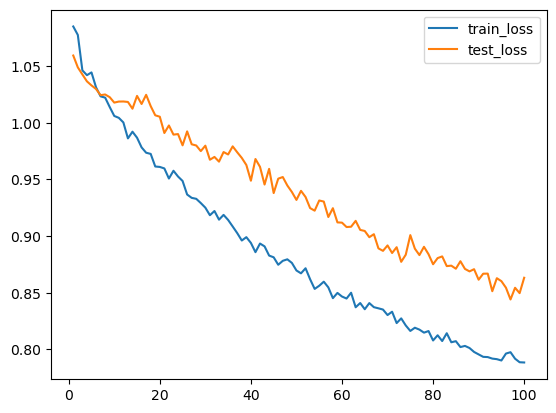

In [39]:
plt.plot(range(1,101),history.history["loss"],label="train_loss")
plt.plot(range(1,101),history.history["val_loss"],label="test_loss") 
plt.legend() 

## Predicting the model

In [43]:
predicted=model.predict(x_test) 
predicted=np.where(predicted>0.5,1,0) 

2/2 [==============================] - 0s 6ms/step


## Evaluating the model

0.6333333333333333


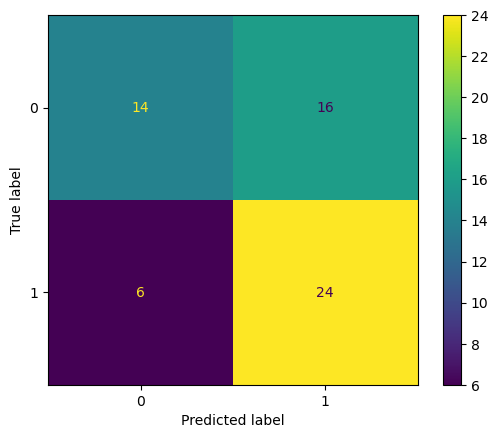

In [44]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
print(accuracy_score(y_test,predicted))
cm=confusion_matrix(y_test,predicted)
va=ConfusionMatrixDisplay(cm)
va.plot() 
plt.show()  

## PLOTTING THE DECISION SURFACE

In [45]:
from mlxtend.plotting  import plot_decision_regions  

9600/9600 [==============================] - 29s 3ms/step


<AxesSubplot:>

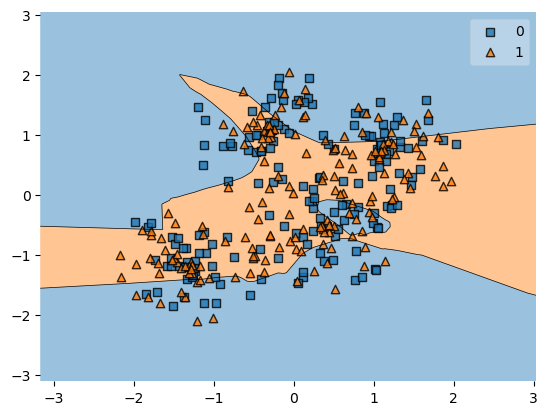

In [46]:
plot_decision_regions(x_train,y_train.values,clf=model) 

9600/9600 [==============================] - 27s 3ms/step


<AxesSubplot:>

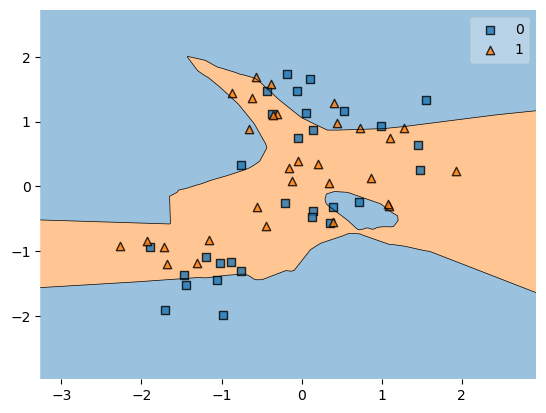

In [47]:
plot_decision_regions(x_test,y_test.values,clf=model)   

## Conclusions:

###### This neural network model achieves an accuracy of 64%. 
- The model architecture consists of 4 hidden layers with the following specifications:

- In the first hidden layer, there are 20 neurons with the ReLU activation function.
- In the second hidden layer, there are 16 neurons with the ReLU activation function.
- In the third hidden layer, there are 10 neurons with the ReLU activation function.

- The output layer uses the sigmoid activation function.

##### Overall, this neural network model architecture and training configuration achieve an accuracy of 64%.
- As this data is random, decision surface is not accurate.
